# Data Quality Analysis as a Precursor to Machine Learning Activities

* A student-information-system (SIS) intends to include additional ML-based insights into its management reporting suite. 

* My task is to review the provided data file and suggest methods to clean the data as part of quality assurance for the ML system.

## Firstly, import the required packages and import the SIS data into a pandas dataframe

In [1]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import SIS data and display the dataframe
address = 'https://raw.githubusercontent.com/PhillGregory/SIS_dataCleaning/main/SIS_dataCleaning/SIS_Faculty-List.csv'
sis = pd.read_csv(address)
sis

,ID,Name,Location,Grade,Title,Join\nDate,LWD,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
0,LT9210743,Jim Hunter,London,FA,Faculty - Business,29-Aug-10,NaN,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,LT9001784,Jose Nadal,London,FA,Faculty - Business,19-Aug-99,NaN,Full Time,Business,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,LT9062955,Pierre Cornet,London,FA,Faculty - Business,08-Apr-07,NaN,Full Time,Business,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,0,Sally Smith,London,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,0,Ned Shearer,London,Chair,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,Cami Wiegand,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Economics and Business,Economics,"South East European University, Macedonia","Bachelor( Political Science), Masters( Europea...","intro to Economics, EU laws and Regulations, O...","Economics, policy and general business course",9 years professional experience+ 11 years teac...,Researcher
280,0,Alan Sheely,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Management Science,Marketing,"University of Economics, Krakow, Poland","Bachelor( Foreign Languages), Masters( America...","Marketing Management, Marketing Research, Cons...",Marketing,16 years professional( consulting) experience ...,Researcher/Curriculum Development
281,0,Allison Gall,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D,HRM,"University of Mauritus, Mauritus","Bachelor( Economics), Masters( Industrial Rela...","HRM, SHRM, Performance and Reward Mgt, Researc...",HRM,14 years professional experience + 9 years tea...,Certification/Researcher
282,0,Myles Tena,Cambridge,FA,Faculty - Business,14-Aug-16,NaN,Full Time,Business,Olu Ebenezer,Ph.D,Ph.D,Economic Sociology,"University of San Paulo, Brazil","Bachelor(Economics), Masters( Industrial Engin...",Economics and Management,"Financial Mgt, Project Mgt, Entrepreneurial Fi...",12 years professional experience + 11 years te...,Researcher


## Explore and clean data
* Drop columns if they have no use for the ML model
* Rename columns, if required
* Check for and address missing values
* Check for and address outliers
* Check for data issues i.e accuracy, consistency, uniformity, completeness, and validity 

In [3]:
sis.columns

Index(['ID', 'Name', 'Location', 'Grade', 'Title', 'Join\nDate', 'LWD', 'Type',
       'Divison', 'Reports To', 'Highest\nQualification\nLevel',
       'Highest Qualification', 'Major', 'University',
       'All Qualifications from Profile', 'Courses Taught- Term 201510',
       'MAJOR TEACHING FIELD',
       'DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications',
       'Criteria'],
      dtype='object')

In [4]:
# Check for null values in columns
sis.isnull().sum()

ID                                                                                                                                 2
Name                                                                                                                               0
Location                                                                                                                          14
Grade                                                                                                                              0
Title                                                                                                                              0
Join\nDate                                                                                                                         1
LWD                                                                                                                              273
Type                                                                 

<Axes: ylabel='Number of Missing Values'>

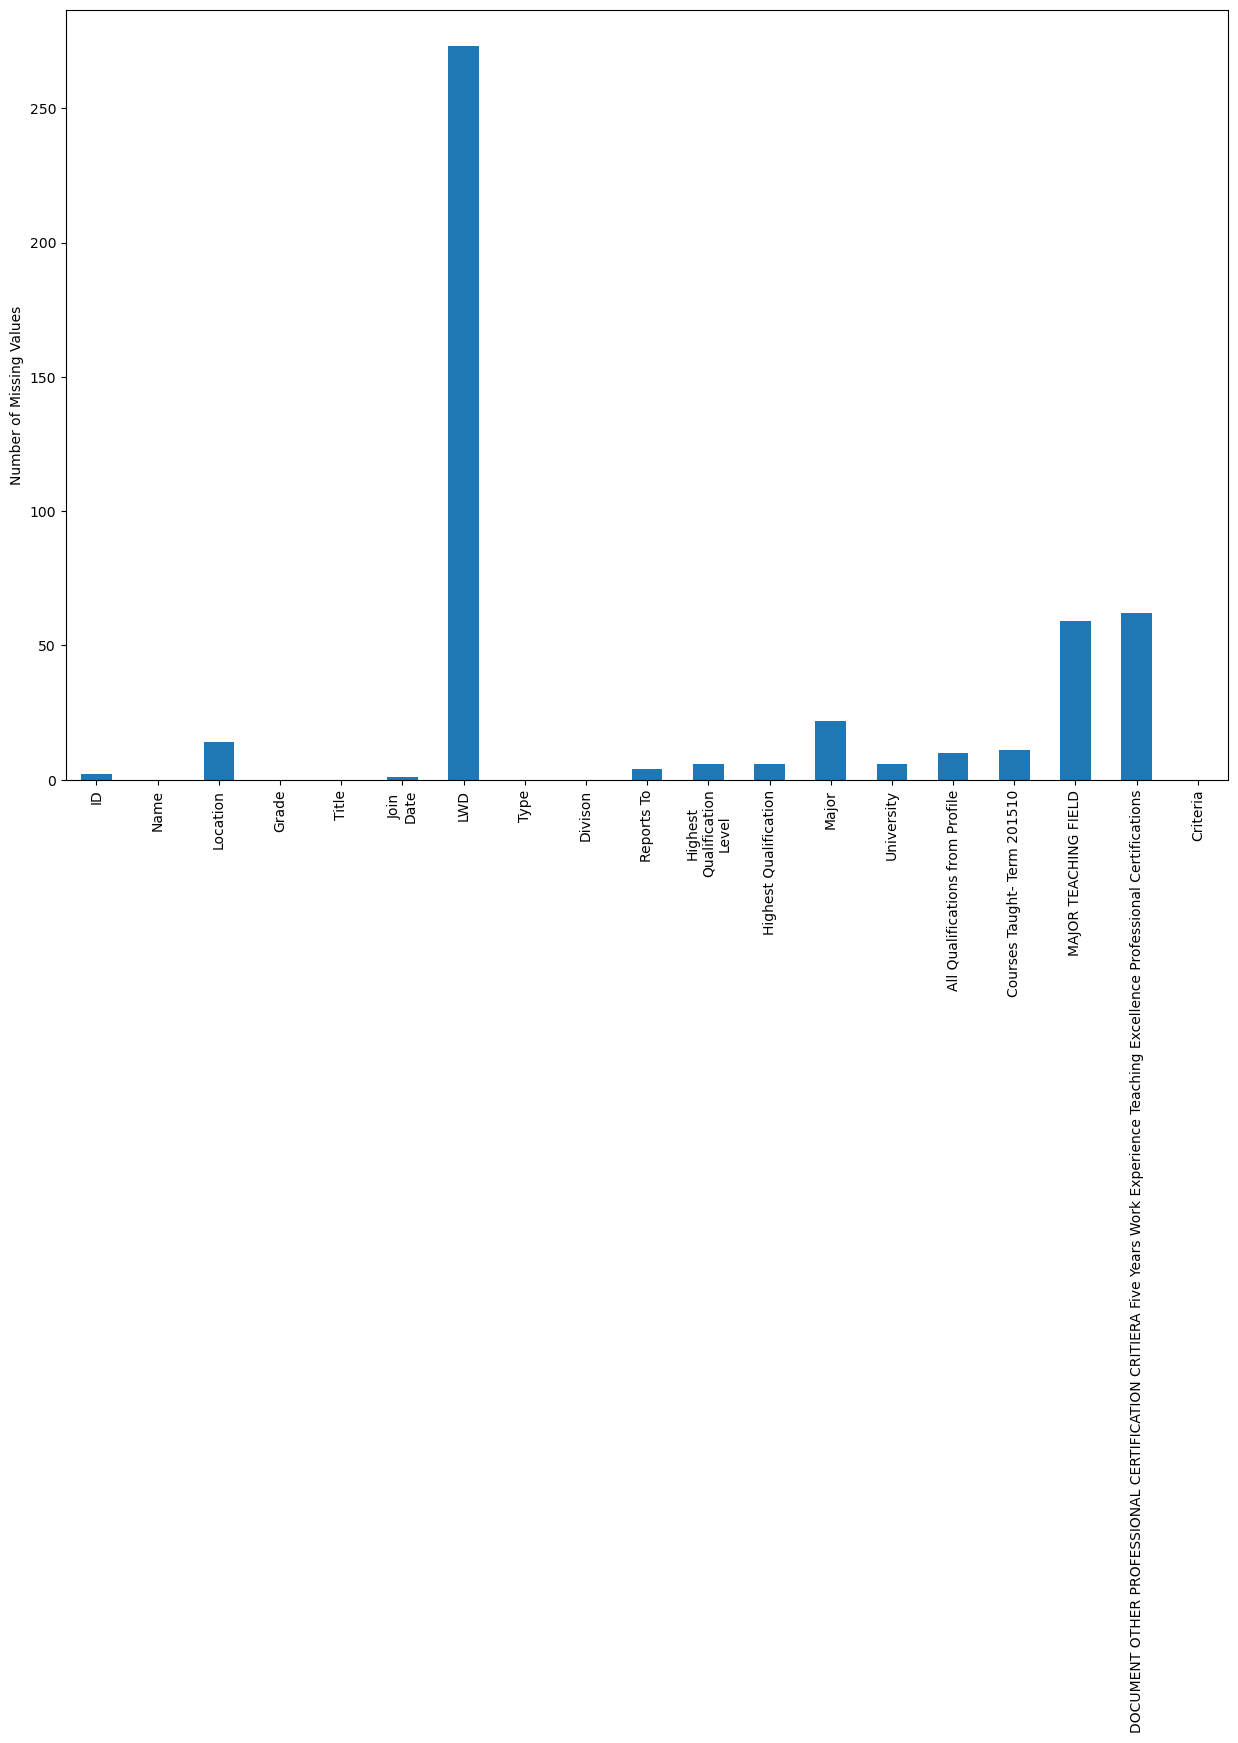

In [5]:
# Visualise null values in a bar chart
sis.isnull().sum().plot(kind='bar', figsize = (15,10), ylabel="Number of Missing Values")

In [6]:
# Drop LWD column due to number of null values and unclear meaning.
sis.drop('LWD', axis=1, inplace=True)

Text(0.5, 1.0, 'Cardinality')

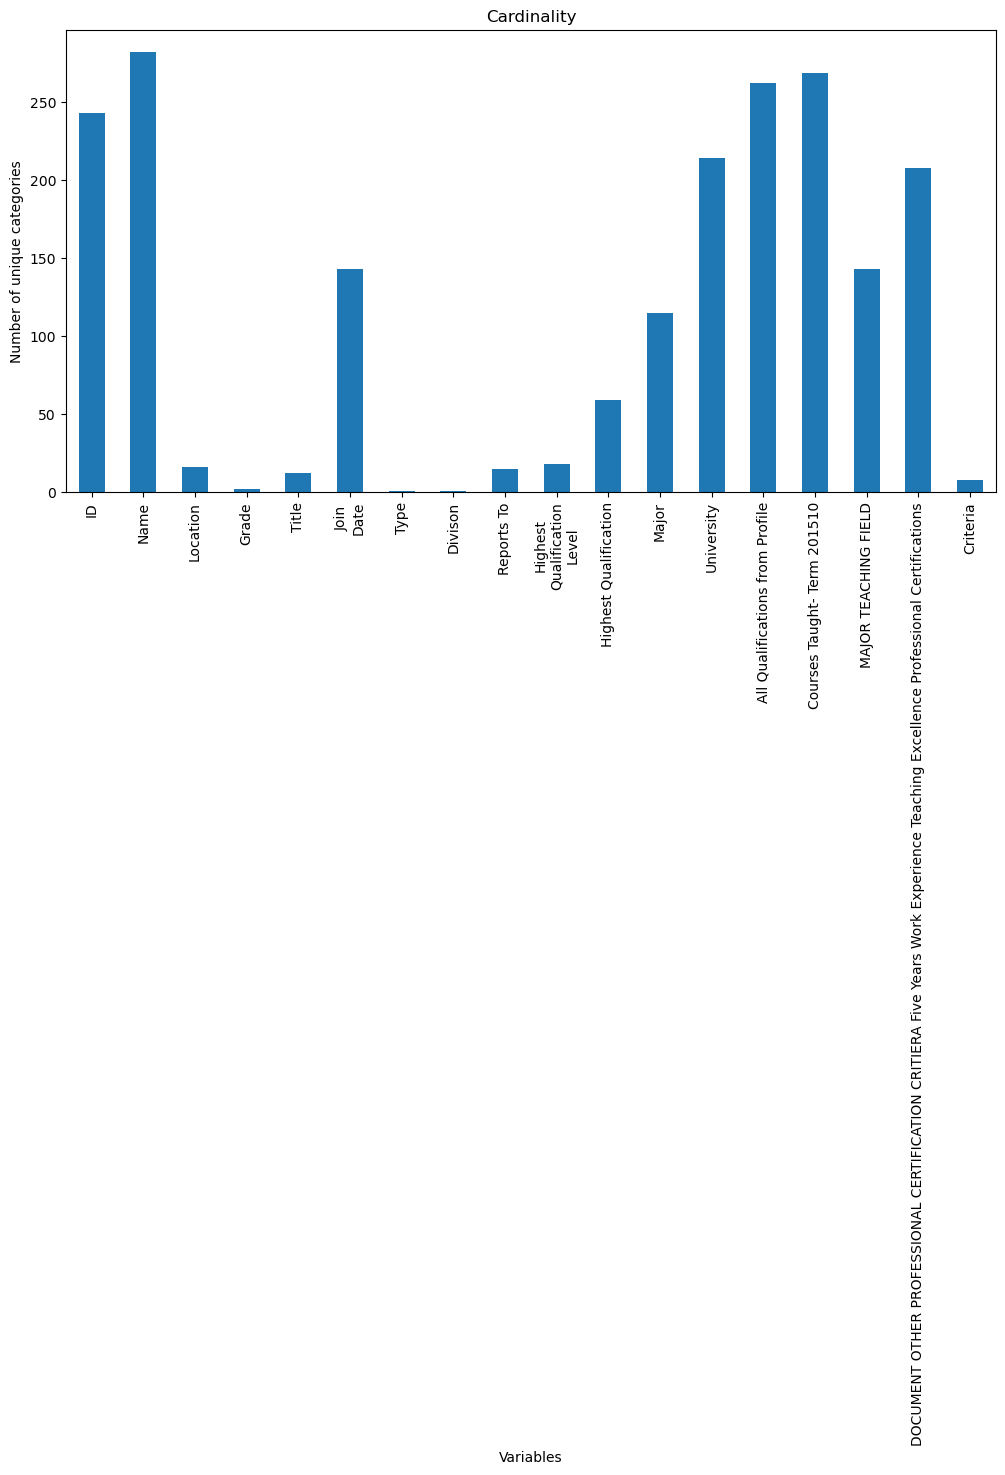

In [7]:
# Visualise initial column cardinality in a bar chart
sis.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [8]:
# ID and Name columns have no use for a ML model so drop these
sis.drop(['ID', 'Name'], axis=1, inplace=True)
sis.head()

,Location,Grade,Title,Join\nDate,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
0,London,FA,Faculty - Business,29-Aug-10,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,London,FA,Faculty - Business,19-Aug-99,Full Time,Business,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,London,FA,Faculty - Business,08-Apr-07,Full Time,Business,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,London,FA,Faculty - Business,14-Aug-16,Full Time,Business,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,London,Chair,Faculty - Business,14-Aug-16,Full Time,Business,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development


In [9]:
# Inspect Location column values
sis['Location'].value_counts()

Location
Bristol        49
Belfast        46
Cambridge      34
Cardiff        22
Liverpool      20
Manchester     20
Oxford         20
Leeds          18
Leicester      16
Bolton          6
London          5
Glasgow         4
Birmingham      3
Southampton     3
Brighton        2
Cardiff         2
Name: count, dtype: int64

In [10]:
# Inspect records where location is null. Already know there is 14 null values from earlier check.
sis[sis['Location'].isnull()]

,Location,Grade,Title,Join\nDate,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
45,NaN,FA,Faculty - Business,16-Sep-02,Full Time,Business,Ian Varley,Doctorate,Doctorate in Marketing,Marketing,University of Westminster,Master of Business Administrat (Business Admin...,CSD1023 - The Crime of Smuggling\nBUS4563 - St...,Business Administration/\nMarketing,ICDL\nIRB\nInstructional Skills Workshops (ISW...,Industry & Teaching experience
46,NaN,FA,Faculty - Business,31-Aug-14,Full Time,Business,Ian Varley,Masters,Master of Commerce,Financial Management,University Of Johannesburg,"Master of Commerce (Financial Management), Bac...",BUS4183 - Corporate Finance\nLSM1003 - Applied...,Business Adminstration/Finance and Investment ...,6 years teaching experience,Industry & Teaching experience
47,NaN,FA,Faculty - Business,14-Aug-95,Full Time,Business,Ian Varley,Masters,Masters in Engineering,Oper. Resch. & Mgt. Info. Sys.,University of Toronto,"Bachelor of Science (Industrial Engineering), ...",NaN,Management Science,"29 years teaching experience, ISO 9001: 2008 I...",Certification
48,NaN,FA,Faculty - Business,18-Feb-15,Full Time,Business,Ian Varley,Masters,Master of Business Administrat,Financial Management,The University of Hull,"Certificate (), Master of Business Administrat...",LSS2533 - Research Methods\nBUS3903 - Contempo...,NaN,NaN,Industry & Teaching experience
49,NaN,FA,Faculty - Business,14-Aug-16,Full Time,Business,Abbas Houda,Ph.D,Ph.D in Economics,Economics,"Michigan State University, USA","Bachelor(Economics), Masters( Economics)","Micro and Macro Economics, Monetary Theory, An...",Economics,28 years professional experience + 3 years tea...,Industry & Teaching experience
50,NaN,FA,Faculty - Business,14-Aug-16,Full Time,Business,Ian Varley,Ph.D,Ph.D in Economics,Economics,"University of Nebraska,USA","Bachelor(Economics), Masters( Economics)","Micro and Macro Economics, Business Stastics, ...",Economics,5 years professional experience + 9 years teac...,Industry & Teaching experience
51,NaN,FA,Faculty - Business,14-Aug-16,Full Time,Business,Ian Varley,Ph.D,PhD in Business Administration,HRM and tourism,"Girne American University, Cyprus","Bachelor (international Relations), Masters( I...","HRM, International Business, TQM, Service Qual...","HRM, Quality and Tourism",5 years professional experience +15 years teac...,Researcher
52,NaN,FA,Faculty - Business,14-Aug-16,Full Time,Business,Ian Varley,Ph.D,Ph.D,Managerial Economics/ Business Strategy,National University of Singapore,Bachelor( International Business and Asian Stu...,"International Business, Innovation, strategic ...","Strategic Mgt, Supply chain, Innovation, Marke...",5 years professional experience + 8 years teac...,Researcher
53,NaN,FA,Faculty - Business,14-Aug-16,Full Time,Business,Ian Varley,Ph.D,Ph.D in Business Administration,Management,"Nova Southeastern University, USA","Bachelor( Economics), Masters(Finance)",Finance and Mgt courses,Finance and Management,12 years Professional experience+ 9 years teac...,Industry & Teaching experience
54,NaN,FA,Faculty - Business,14-Aug-16,Full Time,Business,Ian Varley,Ph.D,Ph.D,Finance and Islamic Banking & Finance,International Islamic University< Malaysia,"Bachelor(insurance), Masters( Islamic Law/ Jur...","Islamic Risk Mgt, Islamic Insurance, Islamic F...",Islamic Finance and Islamic law,7 years Teaching Experience + active researcher,Researcher


In [11]:
# Most of the missing location records report to Ian Varley. Investigate this further.
sis[sis['Reports To']=='Ian Varley'].value_counts('Location')

Location
Manchester    20
Name: count, dtype: int64

Above shows that everyone who reports to Ian Varley is located in Manchester

In [12]:
# Check locations for those who report to Abbas Houda
sis[sis['Reports To']=='Abbas Houda'].value_counts('Location')

Location
Liverpool    18
London        4
Name: count, dtype: int64

Above cells show Ian Varley reports are located in Manchester. Update Ian Varley missing locations to Manchester.

For Abbas Houda reports, the mode location is Liverpool, so replace missing values with Liverpool

In [13]:
sis['Location'].mask(sis['Reports To'] == 'Ian Varley', 'Manchester', inplace=True)
sis['Location'].mask(sis['Reports To'] == 'Abbas Houda', 'Liverpool', inplace=True)

In [14]:
# Recheck null values
sis['Location'].isnull().sum()

0

In [15]:
# Inspect Grade column
sis['Grade'].value_counts()

Grade
FA       282
Chair      2
Name: count, dtype: int64

* 282 out of 284 values are FA
* It is unclear what FA actually means. Due to almost all values being FA, drop this column

In [16]:
sis.drop('Grade',axis=1, inplace=True)

In [17]:
# Inspect Title column
sis['Title'].value_counts()

Title
Faculty - Business                       252
Faculty - Trainee                         13
Adjunct Faculty - Business                 9
Faculty- Business                          2
Faculty - Business (Admin)                 1
Faculty-Business (HR & Admin.)             1
Faculty - Business                         1
Faculty - Business & Comp Lit Faculty      1
Faculty-Business                           1
Business, Comp & Math Faculty              1
Graduate Trainee                           1
Faculty - Business & Comp Lit.             1
Name: count, dtype: int64

* It is clear that Title is mostly split between 'Business' and 'Trainee'.
* I will update values based on this using string conditions

In [18]:
sis['Title'].mask(sis['Title'].str.contains('Business') == True, 'Business', inplace=True)
sis['Title'].mask(sis['Title'].str.contains('Trainee') == True, 'Trainee', inplace=True)

In [19]:
sis['Title'].value_counts()

Title
Business    270
Trainee      14
Name: count, dtype: int64

In [20]:
sis.head()

,Location,Title,Join\nDate,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
0,Liverpool,Business,29-Aug-10,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience
1,Liverpool,Business,19-Aug-99,Full Time,Business,Abbas Houda,Masters,Master of Science,Business Info. Technology,University of Northumbria,"Bachelor of Arts (Finance), Certificate (Manag...",BUS4173 - Managerial Accounting II\nBUS4916 - ...,Business,years of teaching experience: 17 ...,Certification
2,Liverpool,Business,08-Apr-07,Full Time,Business,Abbas Houda,Masters,Master of Business Administrat,Marketing,Griffith University,"Certificate (Educating/Teaching Adult), Associ...",BUS3903 - Contemporary Business\nBUS1303 - Mar...,Marketing and Strategic Management,Years of teaching experience: 15\nYears of pro...,Industry & Teaching experience
3,Liverpool,Business,14-Aug-16,Full Time,Business,Abbas Houda,Ph.D,Ph.D in HRM/ Organizational pyschology,HRM/ Organizational Psychology,"The University of Swansea, UK","Bachelor(finance & Mgt), Masters(MBA & Masters...","HRM, Organizational behaviour, Strategic Mgt, ...",HRM,6 years professional experience + 6 years teac...,Researcher
4,London,Business,14-Aug-16,Full Time,Business,Tony Emmanuel,Ph.D,Ph.D in Economics and International Business,Economics and International Business,"New York University, USA","Bachelor( Economics), Masters( Economics and I...","Micro and Macroeconomics, Statistics,Introduct...",Economics and International Business,1 year professional experience + 24 years teac...,Researcher/Curriculum Development


In [21]:
# Inspect Join Date column. First rename.
sis = sis.rename(columns={'Join\nDate':'Join Date'})
sis.head(1)

,Location,Title,Join Date,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
0,Liverpool,Business,29-Aug-10,Full Time,Business,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience


In [22]:
# Inspect Join Date values
sis['Join Date'].value_counts()

Join Date
14-Aug-16    41
26-Aug-12    16
09-Aug-15    15
17-Aug-14    11
23-Aug-15     8
             ..
16-Sep-12     1
01-Oct-12     1
31-Aug-10     1
06-Sep-15     1
02-Aug-09     1
Name: count, Length: 143, dtype: int64

* Cardinality is an issue in this column as there are 143 unique dates
* Earlier inspection revealed there was 1 missing value. As this is categorical data, I will fill this with the mode value

In [23]:
sis['Join Date'].fillna('14-Aug-16', inplace=True)

In [24]:
sis['Join Date'].isnull().sum()

0

In [25]:
# To reduce unique values, I will group dates into years
sis['Join Date'] = pd.to_datetime(sis['Join Date'])

/var/folders/wz/1k6yj9pn3kj1s5gppbqtnn280000gn/T/ipykernel_24816/2025851512.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sis['Join Date'] = pd.to_datetime(sis['Join Date'])


In [26]:
sis['Join Date'] = sis['Join Date'].dt.year

In [27]:
sis['Join Date'].value_counts()

Join Date
2014    52
2015    50
2016    42
2012    27
2013    23
2011    17
2010    11
2008    10
2007     9
2009     9
1997     6
2004     4
1999     4
2000     3
2005     3
1995     3
1996     2
2002     2
1993     1
2003     1
2006     1
1992     1
1989     1
1998     1
1990     1
Name: count, dtype: int64

There are still too many values so I will set use a value frequency threshold, and group all dates together that fall below the threshold.

In [28]:
date_freq = sis['Join Date'].value_counts()/len(sis)
date_freq

Join Date
2014    0.183099
2015    0.176056
2016    0.147887
2012    0.095070
2013    0.080986
2011    0.059859
2010    0.038732
2008    0.035211
2007    0.031690
2009    0.031690
1997    0.021127
2004    0.014085
1999    0.014085
2000    0.010563
2005    0.010563
1995    0.010563
1996    0.007042
2002    0.007042
1993    0.003521
2003    0.003521
2006    0.003521
1992    0.003521
1989    0.003521
1998    0.003521
1990    0.003521
Name: count, dtype: float64

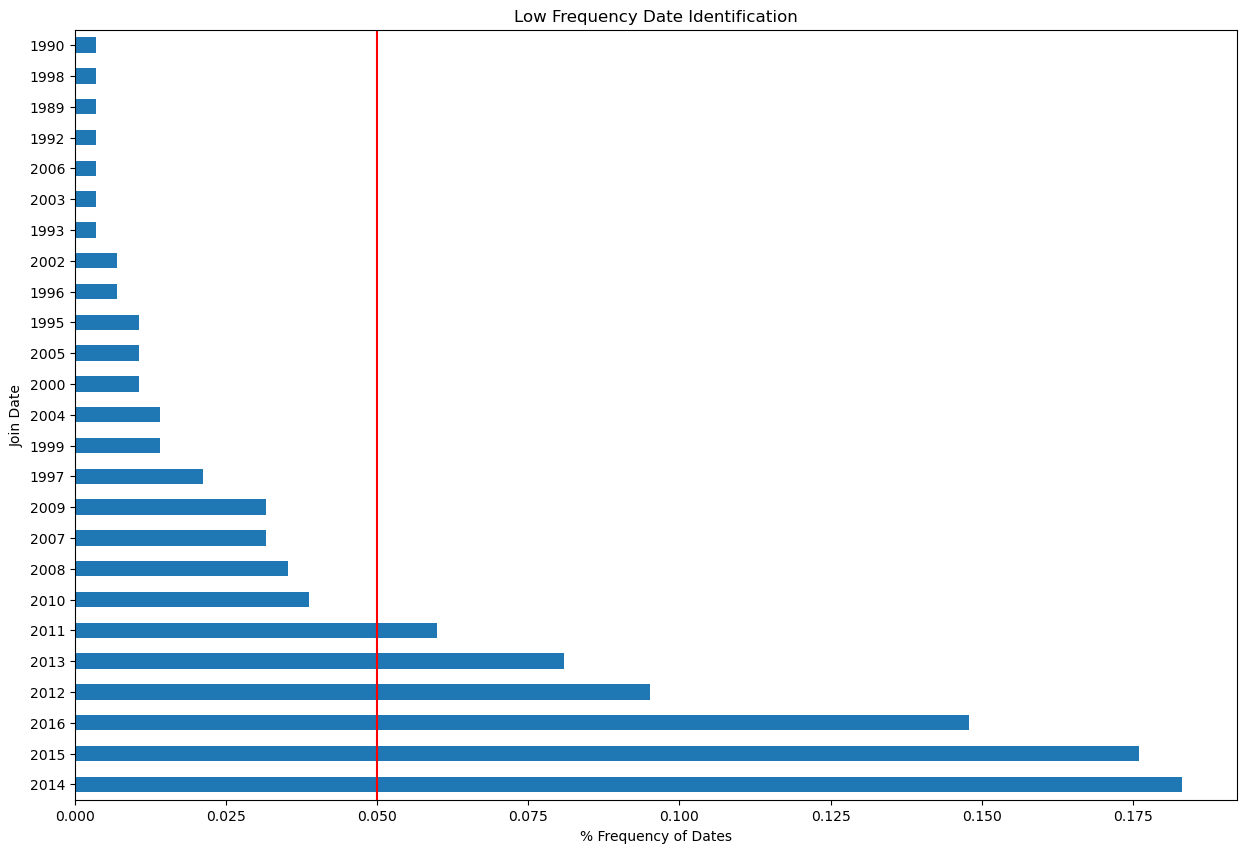

In [29]:
# I will use 5% as the threshold
fig = date_freq.sort_values(ascending=False).plot.barh(figsize=(15,10))
fig.axvline(x=0.05, color='red')
fig.set_xlabel('% Frequency of Dates')
fig.set_ylabel('Join Date')
fig.set_title('Low Frequency Date Identification')
plt.show()

Anything earlier than 2011 has less than 5% frequency. I will group rare values in a category called '<2011'

In [30]:
sis['Join Date'].mask(sis['Join Date']<2011, '<2011', inplace=True)

/var/folders/wz/1k6yj9pn3kj1s5gppbqtnn280000gn/T/ipykernel_24816/1225422100.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<2011' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  sis['Join Date'].mask(sis['Join Date']<2011, '<2011', inplace=True)


In [31]:
sis['Join Date'].value_counts()

Join Date
<2011    73
2014     52
2015     50
2016     42
2012     27
2013     23
2011     17
Name: count, dtype: int64

In [32]:
# Inspect Type column
sis['Type'].value_counts()

Type
Full Time    284
Name: count, dtype: int64

In [33]:
# Inspect Division column
sis['Divison'].value_counts()

Divison
Business    284
Name: count, dtype: int64

In [34]:
# Drop both Type and Division as they only contain single values so are not useful
sis.drop(['Type','Divison'], axis=1, inplace=True)

In [35]:
# Inspect null values in Reports To column
sis[sis['Reports To'].isnull()]

,Location,Title,Join Date,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
21,Liverpool,Business,2015,NaN,Masters,Master of Business Administrat,Human Resource Management,Charles Sturt University,"Bachelor of Business Info. Systems (Business),...",NaN,NaN,NaN,Industry & Teaching experience
22,Liverpool,Business,2015,NaN,Masters,Masters,Human Resource Management,The University of Bolton,"Bachelor (Commerce), Masters (Human Resource M...",NaN,NaN,NaN,Industry & Teaching experience
100,Bristol,Business,<2011,NaN,Masters,MA in Accounting,Accounting,Bowling Green State University,Bachelor in Business Administration (General B...,NaN,NaN,NaN,Industry & Teaching experience
101,Bristol,Business,2015,NaN,NaN,NaN,NaN,NaN,"Masters (Finance), Bachelor (Economics)",NaN,NaN,NaN,Industry & Teaching experience


* As previously seen, 'Reports To' and 'Location' appear to be linked
* I will find out who Liverpool and Bristol located people most commonly report to and use this to impute the missing values

In [36]:
sis[['Location', 'Reports To']][sis['Location']=='Liverpool'].value_counts()

Location   Reports To 
Liverpool  Abbas Houda    23
Name: count, dtype: int64

In [37]:
sis[['Location', 'Reports To']][sis['Location']=='Bristol'].value_counts()

Location  Reports To   
Bristol   Daphne Keaton    22
          Kim Hughes       18
          Nick Omotayo      7
Name: count, dtype: int64

In [38]:
sis.at[21, 'Reports To'] = 'Abbas Houda'
sis.at[22, 'Reports To'] = 'Abbas Houda'
sis.at[100, 'Reports To'] = 'Daphne Keaton'
sis.at[101, 'Reports To'] = 'Daphne Keaton'

In [39]:
sis['Reports To'].isnull().sum()

0

In [40]:
sis['Reports To'].value_counts()

Reports To
Ian Varley          33
Olu Ebenezer        31
Abbas Houda         25
Rob Jenkins         25
Daphne Keaton       24
Harriet Mensah      23
Jayne Radford       23
Orlamei Princess    21
Kim Hughes          20
Sean Woods          20
Betty Adewuyi       19
Ian Westwood         9
Nick Omotayo         7
Tony Emmanuel        3
Chris Peters         1
Name: count, dtype: int64

In [41]:
sis.head(1)

,Location,Title,Join Date,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
0,Liverpool,Business,<2011,Abbas Houda,Masters,Master of Arts,International Affairs,American University of Beirut,"Bachelor of Science (Communications), Master o...",BUS2403 - Innovation & Entrepreneurship\nBUS20...,Business Administration,"10+ Years Small Business Ownership, 10+ Years ...",Industry & Teaching experience


In [42]:
# Rename Highest\nQualification\nLevel column
sis.rename(columns={'Highest\nQualification\nLevel':'Highest Qualification Level'}, inplace=True)

In [43]:
# Check values for Highest Qualification Level
sis['Highest Qualification Level'].value_counts()

Highest Qualification Level
Masters                                                                     157
Doctorate                                                                    52
Ph.D                                                                         43
Bachelor                                                                     12
Masters (Business Administration), Master of Philosophy (Business)            1
 Doctorate of Business Administration                                         1
 Ph. D. (Business Administration)                                             1
Maters of Philosophy (Economics)                                              1
Master's Degree in Public Relations and Press Office Management               1
PhD Corporate Governance and Accounting                                       1
Master of Business Administration (MBA) and MA (Economics)                    1
Bachelor (Applied Science) in Business administration( Human Resources )      1
Ph.D in Orga

* Highest Qualification Level has too many inconsistent data categories
* This column should only represent the qualification level, not the area of study
* Simplify this into 3 groups: Bachelor, Masters, Doctorate

In [44]:
hql = sis['Highest Qualification Level']

hql.mask(hql.str.contains('Doctor', case=False) == True, 'Doctorate', inplace=True)
hql.mask(hql.str.contains('Ph.D', case=False) == True, 'Doctorate', inplace=True)
hql.mask(hql.str.contains('Ph. D', case=False) == True, 'Doctorate', inplace=True)
hql.mask(hql.str.contains('PhD', case=False) == True, 'Doctorate', inplace=True)
hql.mask(hql.str.contains('Master', case=False) == True, 'Masters', inplace=True)
hql.mask(hql.str.contains('Mater', case=False) == True, 'Masters', inplace=True)
hql.mask(hql.str.contains('MBA', case=False) == True, 'Masters', inplace=True)
hql.mask(hql.str.contains('Bach', case=False) == True, 'Bachelor', inplace=True)

In [45]:
hql.value_counts()

Highest Qualification Level
Masters      164
Doctorate    101
Bachelor      13
Name: count, dtype: int64

In [46]:
sis['Highest Qualification Level'] = hql

In [47]:
# Inspect Highest Qualification Column
sis['Highest Qualification'].value_counts()

Highest Qualification
Master of Business Administrat                                              73
Ph.D                                                                        63
Master of Science                                                           18
Masters                                                                     17
Master of Commerce                                                           9
Bachelor of Applied Science                                                  9
Master of Arts                                                               7
Doctorate                                                                    7
Ph.D in Business Administration                                              7
Executive MBA                                                                5
Doctorate in Philosophy                                                      4
Master of Philosophy                                                         4
Master of Management          

* Highest Qualification is a lower level of detail to Highest Qualification Level
* Keep this column but update records to associated UK qualification codes for consistency

In [48]:
# First update any Doctorate level records to Ph.D
hq = sis['Highest Qualification']

hq.mask(hq.str.contains('Ph', case=False) == True, 'Ph.D', inplace=True)
hq.mask(hq.str.contains('Doctorate', case=False) == True, 'Ph.D', inplace=True)

### Qualification abbreviations can easily be sourced online. I will use these abbreviations to populate the Highest Qualification column

### Bachelor's Degree
* Bachelor of Arts (BA)
* Bachelor of Science (BSc)
* Bachelor of Education (BEd)
* Bachelor of Engineering (BEng)
* Bachelor of Laws (LLB)
* Bachelor of Medicine, Bachelor of Surgery (MB ChB)
* Bachelor of Business Administration (BBA)

### Master's Degree
* Master of Arts (MA)
* Master of Science (MSc)
* Master of Education (MEd)
* Master of Research (MRes)
* Master of Philosophy (MPhil)
* Master of Business Administration (MBA)
* Master's Degree in Law (LLM)
* Master's of Commerce (MCom)
* Master's in Public Relations (MPR)
* Master's in Finance (MFin)
* Marketing related (MMkt)
* Master of Professional Studies (MPS)

In [49]:
hq.mask(hq.str.contains('Master of Business') == True, 'MBA', inplace=True)
hq.mask(hq.str.contains('Master of International Business') == True, 'MBA', inplace=True)
hq.mask(hq.str.contains('Master of Science') == True, 'MSc', inplace=True)
hq.mask(hq.str.contains('Engineering') == True, 'MSc', inplace=True)
hq.mask(hq.str.contains('Management Science') == True, 'MSc', inplace=True)
hq.mask(hq.str.contains('Strategic HR') == True, 'MSc', inplace=True)
hq.mask(hq.str.contains('Quality Management') == True, 'MSc', inplace=True)
hq.mask(hq.str.contains('Master of Commerce') == True, 'MCom', inplace=True)
hq.mask(hq.str.contains('Master of Arts') == True, 'MA', inplace=True)
hq.mask(hq.str.contains('MBA') == True, 'MBA', inplace=True)
hq.mask(hq.str.contains('MA') == True, 'MA', inplace=True)
hq.mask(hq.str.contains('Philosophy') == True, 'MPhil', inplace=True)
hq.mask(hq.str.contains('Master of Management') == True, 'MMgt', inplace=True)
hq.mask(hq.str.contains('Education') == True, 'MEd', inplace=True)
hq.mask(hq.str.contains('Master of Law') == True, 'LLM', inplace=True)
hq.mask(hq.str.contains('Public Relations') == True, 'MPR', inplace=True)
hq.mask(hq.str.contains('Finance') == True, 'MFin', inplace=True)
hq.mask(hq.str.contains('Market') == True, 'MMkt', inplace=True)
hq.mask(hq.str.contains('Professional') == True, 'MPS', inplace=True)

In [50]:
hq.mask(hq.str.contains('Applied Science') == True, 'BSc', inplace=True)
hq.mask(hq.str.contains('Bachelor of Science') == True, 'BSc', inplace=True)
hq.mask(hq.str.contains('Bachelor of Business Admin') == True, 'BSc', inplace=True)

In [51]:
hq.value_counts()

Highest Qualification
Ph.D                      105
MBA                        84
MSc                        22
Masters                    17
MA                         12
BSc                        12
MCom                        9
MEd                         4
MMgt                        3
LLM                         2
MMkt                        2
Master of                   1
MPS                         1
MFin                        1
Bachelor                    1
MPR                         1
Economics and Business      1
Name: count, dtype: int64

* 'Masters', 'Master of' do not have subject info. Use 'All Qualifications From Profile' to update these values
* Replace 'Bachelor' with 'BSc'
* Economics and Business' is best replaced with 'MSc'. This is the most common similar value.


In [52]:
hq.mask(hq.str.contains('Economics') == True, 'MSc', inplace=True)
hq.mask(hq.str.contains('Bach') == True, 'BSc', inplace=True)

In [53]:
sis['Highest Qualification'] = hq

In [54]:
pd.set_option('display.max_colwidth', None)
qualifications = sis[['Highest Qualification', 'All Qualifications from Profile']]
qualifications[qualifications['Highest Qualification']=='Masters']

,Highest Qualification,All Qualifications from Profile
6,Masters,"Bachelor (Accounting & Finance), Masters (Health Administration), Post Degree Certificate (Finance), Post Graduate Certificate (Accounting & Finance), Post Degree Certificate (Training & HR Management)"
8,Masters,"Masters (Business), Bachelor (Hotel Management), Certificate (Training & Assessment Systems)"
18,Masters,Masters (Business Education)
22,Masters,"Bachelor (Commerce), Masters (Human Resource Management), Masters (Marketing)"
30,Masters,"Bachelor (Educational Studies), Certificate (Educational Studies), Masters (International Business), Post Graduate Diploma (Executive Human Resources Mgt)"
36,Masters,"Masters (International Marketing), Bachelor (Business)"
65,Masters,"Graduate Diploma (Education), Certificate (Training & Assessment Systems), Bachelor of Business (Marketing), Masters (Intl Law and Intl Relations)"
84,Masters,"Bachelor (Economics), Post Graduate Diploma (Transportation Management), Masters (Finance), Masters (Logistics Engineering)"
95,Masters,"Masters (Accounting & Finance), Bachelor (Business Administration), Certificate (Educational Studies)"
125,Masters,"Masters (), Bachelor (Business Administration)"


The required info is in the 'All Qualifications From Profile' column. Use this to impute conistent value into the 'Highest Qualification' column

In [55]:
sis.at[6,'Highest Qualification']= 'MSc'
sis.at[8,'Highest Qualification']= 'MBA'
sis.at[18,'Highest Qualification']= 'MBA'
sis.at[22,'Highest Qualification']= 'MBA'
sis.at[30,'Highest Qualification']= 'MSc'
sis.at[36,'Highest Qualification']= 'MMkt'
sis.at[65,'Highest Qualification']= 'LLM'
sis.at[84,'Highest Qualification']= 'MFin'
sis.at[95,'Highest Qualification']= 'MFin'
sis.at[125,'Highest Qualification']= 'MBA' # Decision based on Bachelor's being in Business Administration
sis.at[131,'Highest Qualification']= 'MSc'
sis.at[146,'Highest Qualification']= 'MSc'
sis.at[158,'Highest Qualification']= 'MSc'
sis.at[162,'Highest Qualification']= 'MSc'
sis.at[167,'Highest Qualification']= 'MBA'
sis.at[207,'Highest Qualification']= 'MSc'
sis.at[244,'Highest Qualification']= 'LLM'

Now analyse low frequency values and categorise these as 'Other'.

In [56]:
hq_freq = sis['Highest Qualification'].value_counts()/len(sis)

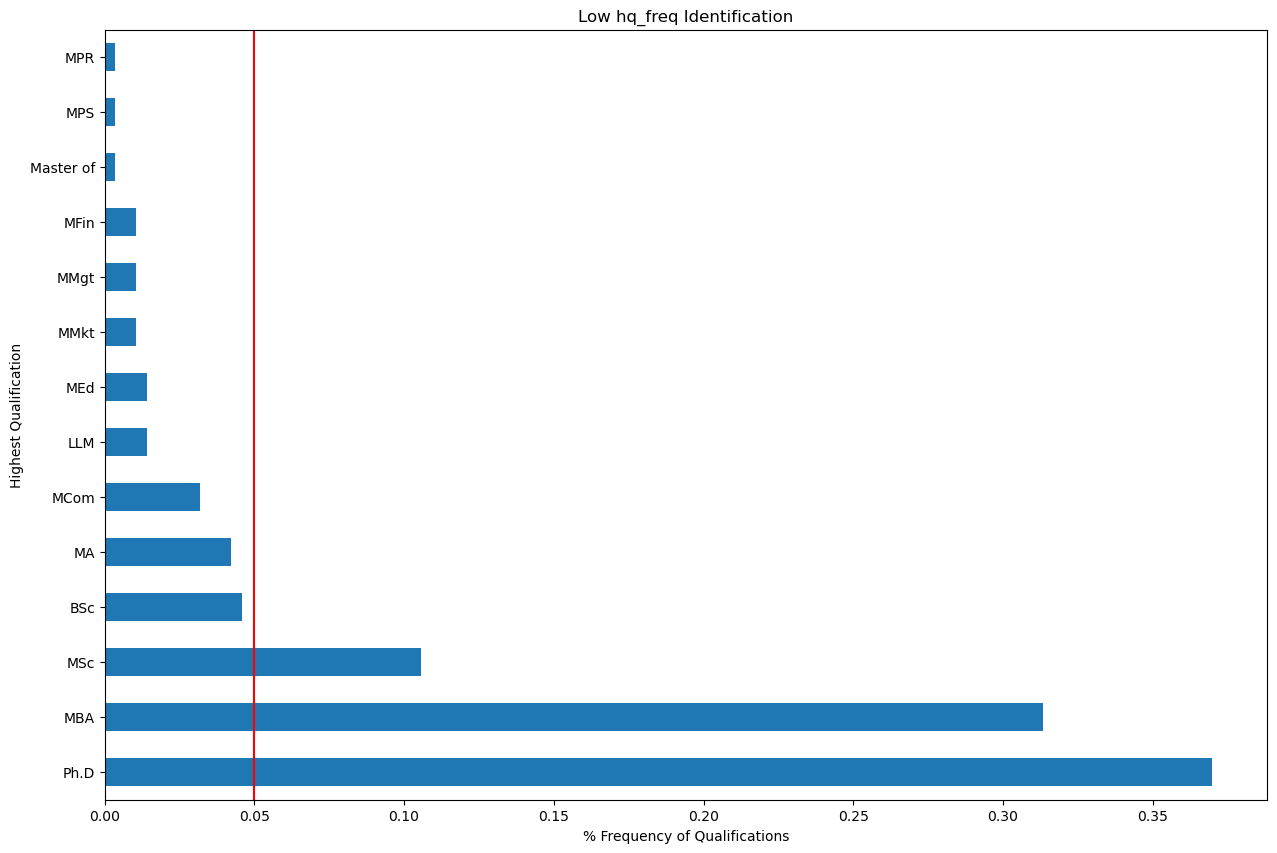

In [57]:
# I will use 5% as the threshold
fig = hq_freq.sort_values(ascending=False).plot.barh(figsize=(15,10))
fig.axvline(x=0.05, color='red')
fig.set_xlabel('% Frequency of Qualifications')
fig.set_ylabel('Highest Qualification')
fig.set_title('Low hq_freq Identification')
plt.show()

5% threshold may be too high in this instance as Bachelors has been excluded. Amend threshold to 3%.

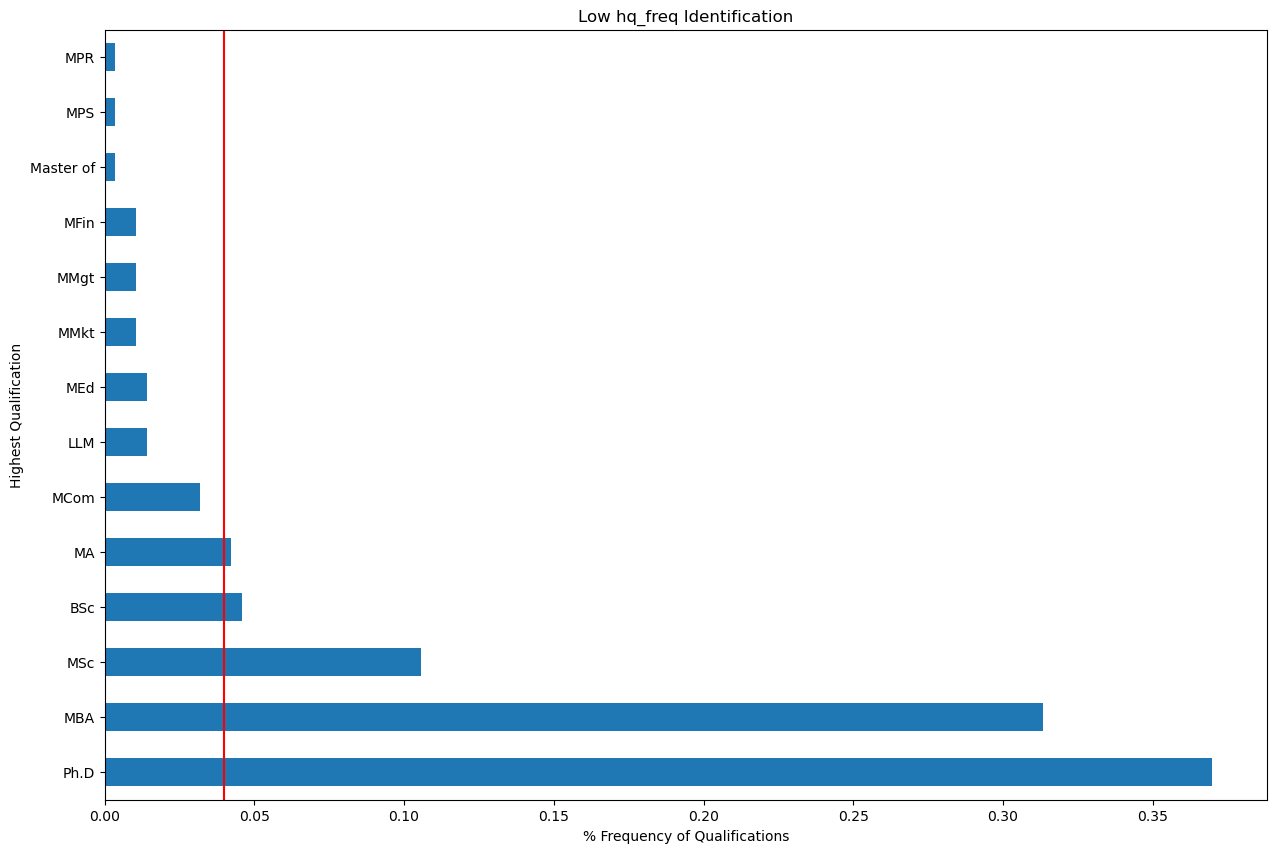

In [58]:
fig = hq_freq.sort_values(ascending=False).plot.barh(figsize=(15,10))
fig.axvline(x=0.04, color='red')
fig.set_xlabel('% Frequency of Qualifications')
fig.set_ylabel('Highest Qualification')
fig.set_title('Low hq_freq Identification')
plt.show()

In [59]:
# Group any values below 3% threshold as 'Other'
sis['Highest Qualification'].value_counts()

Highest Qualification
Ph.D         105
MBA           89
MSc           30
BSc           13
MA            12
MCom           9
LLM            4
MEd            4
MMkt           3
MMgt           3
MFin           3
Master of      1
MPS            1
MPR            1
Name: count, dtype: int64

In [60]:
low_freq_hq = sis['Highest Qualification'].value_counts()[sis['Highest Qualification'].value_counts() <= 10].index
sis['Highest Qualification'].replace(low_freq_hq, 'Other', inplace=True)

In [61]:
sis['Highest Qualification'].value_counts()

Highest Qualification
Ph.D     105
MBA       89
MSc       30
Other     29
BSc       13
MA        12
Name: count, dtype: int64

In [62]:
# Inspect 'Major' column
sis['Major'].value_counts()

Major
Business Administration         45
Management                      22
Economics                        9
Marketing                        8
Business                         8
                                ..
Intl Law and Intl Relations      1
European Business Studies        1
Taxation                         1
HRM and Strategic Mgt            1
Management and Financial Mgt     1
Name: count, Length: 115, dtype: int64

* There are too many unique values. To be useful, 'Major' needs to have fewer unique values. 
* Many of these values are single occurences. I will visualise values based on their frequecy until I find some consistency

<Axes: ylabel='Major'>

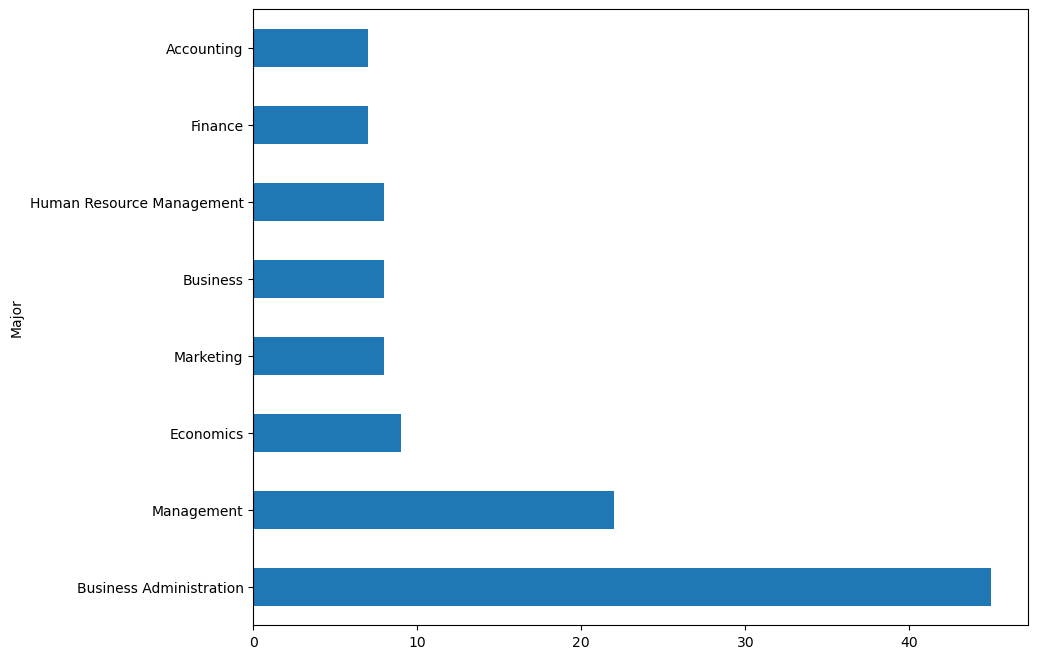

In [63]:
sis['Major'][sis.groupby('Major')['Major'].transform('size') > 6].value_counts().plot(kind='barh', figsize=(10,8))

Values with a frequency greater than 6 is visualised above. I will use this to group 'Major' into much fewer categories.

In [64]:
# Use the 'string contains' method to group similar majors into the above categories
ma = sis['Major']

ma.mask(ma.str.contains('Business') == True, 'Business Administration', inplace=True)
ma.mask(ma.str.contains('Management') == True, 'Management', inplace=True)
ma.mask(ma.str.contains('HRM') == True, 'Management', inplace=True)
ma.mask(ma.str.contains('Mgt') == True, 'Management', inplace=True)
ma.mask(ma.str.contains('Mgmt') == True, 'Management', inplace=True)
ma.mask(ma.str.contains('Mngt') == True, 'Management', inplace=True)
ma.mask(ma.str.contains('Economics') == True, 'Economics', inplace=True)
ma.mask(ma.str.contains('Market') == True, 'Marketing', inplace=True)
ma.mask(ma.str.contains('Comm') == True, 'Marketing', inplace=True)
ma.mask(ma.str.contains('Financ') == True, 'Finance', inplace=True)
ma.mask(ma.str.contains('Bank') == True, 'Finance', inplace=True)
ma.mask(ma.str.contains('Account') == True, 'Finance', inplace=True)
ma.mask(ma.str.contains('Edu') == True, 'Education', inplace=True)
ma.mask(ma.str.contains('eaching') == True, 'Education', inplace=True)

In [65]:
ma.value_counts()

Major
Business Administration           85
Management                        75
Finance                           26
Marketing                         20
Economics                         15
Education                          9
Executive MBA                      2
Law                                2
International Affairs              1
International Administration       1
Interdisciplinary Studies          1
Applied  Linguistics               1
Organization And Leadership        1
Engineering                        1
Information Technology             1
Organizational Excellence          1
Integrtd Textile & Apparel Sci     1
Statistics                         1
Social Science                     1
Occupational Psychology            1
HRD                                1
Instructional Technology           1
Operational Research               1
TESOL                              1
Criminology & Criminal Justice     1
Human Resource Development         1
Internal Auditing               

Anything with a count below 9, I will categorise as 'Other'

In [66]:
sis['Major'] = ma

# List top 6 categories
ma_top6 = sis.groupby('Major').Major.count().nlargest(6).index

# Categorise anything outside the top 5 as 'Other'
sis['Major'] = sis.Major.where(sis.Major.isin(ma_top6), other='Other')

In [67]:
sis['Major'].value_counts()

Major
Business Administration    85
Management                 75
Other                      54
Finance                    26
Marketing                  20
Economics                  15
Education                   9
Name: count, dtype: int64

I will also group together 'Finance' and 'Economics' as these are close enough to be a single category

In [68]:
sis['Major'].mask(sis['Major'].str.contains('Economics') == True, 'Finance', inplace=True)

In [69]:
sis['Major'].value_counts()

Major
Business Administration    85
Management                 75
Other                      54
Finance                    41
Marketing                  20
Education                   9
Name: count, dtype: int64

In [70]:
sis['Major'].isnull().sum()

0

In [71]:
# Inspect 'University' column
sis['University'].value_counts()

University
University of Wollongong                  8
University of Madras                      5
Swiss Management Center                   5
University of Leicester                   5
Harvard University                        4
                                         ..
Glasgow Caledonian University             1
Vilnius University                        1
St. Joseph's University                   1
Milano Graduate School of Mang            1
Virginia Commonwealth University, USA     1
Name: count, Length: 214, dtype: int64

Cardinality is far too high in this column for a ML model. As there are so many unique Universities, I believe this feature cannot be used as a predictor variable. Therefore, drop this column.

In [72]:
sis.drop('University', axis=1, inplace=True)

In [73]:
sis.head(1)

,Location,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
0,Liverpool,Business,<2011,Abbas Houda,Masters,MA,Other,"Bachelor of Science (Communications), Master of Arts (International Affairs), Master of Business Administrat (Business Administration)","BUS2403 - Innovation & Entrepreneurship\nBUS2003 - Business and Commercial Law\nLSG2013 - Globalization, Media & Soc\nBUS1003 - Management and Leadership",Business Administration,"10+ Years Small Business Ownership, 10+ Years SME Consulting, 10+ Years Corporate/Vocational Business Training, 8 Years Teaching Experience",Industry & Teaching experience


In [74]:
# Inspect 'All Qualifications from Profile'
sis['All Qualifications from Profile'].value_counts()

All Qualifications from Profile
Master of Business Administrat (Business Administration)                                                     7
Bachelor of Applied Science (Business Adm (Hum Resources)), Higher Diploma (Business Adm (Hum Resources))    2
Bachelor of Commerce (Commerce), Master of Business Administrat (Business Administration)                    2
Bachelor(Economics), Masters( Economics)                                                                     2
Bachelor of Applied Science (Information Management), Higher Diploma (Info. Admin. Concentration)            2
                                                                                                            ..
Masters (Finance), Bachelor (Economics)                                                                      1
Bachelor(Banking and Monetary Economics), Masters( Banking and Monetary Economics)                           1
Bachelor(Accounting), Masters(Accounting & Finance)                             

## Replace this column with something more useful

* 'All Qualifications from Profile' has a large cardinality due to the variance that arises from a list of 'All Qualifications from Profile'. In reality, there will be limited data where people who have studied the exact same qualifications which will make it very difficult for a ML model to identify patterns.
* As the previous three columns provide categorical details on highest qualifications and majors studied, this column contains a lot of repeated non-uniform data
* To be of any use, I propose changing this column to 'No. of Qualifications'
* Commas are typically used to seperate individual qualifications in a list so I will assume the below:
* (No. of Qualifications) = (No. of commas in a value) + 1

In [75]:
sis['All Qualifications from Profile'].str.count(',').unique()

array([ 2.,  4.,  1.,  3.,  0., nan,  7.,  5., 10.,  6.])

In [76]:
# Inspect null values in this column to see if they can be imputed
sis[sis['All Qualifications from Profile'].isnull()]

,Location,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria
11,Liverpool,Business,2015,Abbas Houda,Doctorate,Ph.D,Other,NaN,BUS4373 - Strategic HRM\nBUS3203 - Strat Mgt Busi Simulation,NaN,NaN,Industry & Teaching experience
75,Bristol,Business,2015,Daphne Keaton,Doctorate,Ph.D,Other,NaN,BUS2003 - Business and Commercial Law\nBUS4233 - Financial Assets and Markets,NaN,NaN,Industry & Teaching experience
108,Brighton,Business,2015,Kim Hughes,Masters,MBA,Other,NaN,NaN,NaN,NaN,Industry & Teaching experience
134,Belfast,Trainee,2015,Orlamei Princess,Masters,MBA,Other,NaN,BUS2403 - Innovation & Entrepreneurship\nBUS1403 - Business Ethics and Corporate,NaN,NaN,Industry & Teaching experience
154,Belfast,Business,2015,Orlamei Princess,Doctorate,Ph.D,Other,NaN,BUS3903 - Contemporary Business\nBUS1203 - Software Apps for Business\nBSD2067 - Business Work Placement\nBUS1303 - Marketing,NaN,NaN,Industry & Teaching experience
160,Belfast,Business,2015,Rob Jenkins,Masters,MBA,Other,NaN,BUS2203 - Business Stats for Managers\nBUS4553 - Strategic Supply Chain Managem\nBUS3406 - Work Related Learning\nBUS4513 - Strat Decisions with Mgt Sc,NaN,NaN,Industry & Teaching experience
243,Leicester,Business,2015,Betty Adewuyi,Doctorate,Ph.D,Other,NaN,BUS2303 - Financial Management\nBUS4123 - Auditing,NaN,NaN,Industry & Teaching experience
253,Cambridge,Business,2015,Betty Adewuyi,Masters,Other,Other,NaN,BSD2263 - Socially Responsible Retailing\nBUS1303 - Marketing,NaN,NaN,Industry & Teaching experience
263,Cambridge,Business,2015,Olu Ebenezer,Doctorate,Ph.D,Other,NaN,BUS4683 - Middle East Devt. & Logistics\nBUS2203 - Business Stats for Managers,NaN,NaN,Industry & Teaching experience
274,Cambridge,Business,2015,Olu Ebenezer,Doctorate,Ph.D,Other,NaN,BUS3003 - Managing People &Organisations\nBUS1303 - Marketing,NaN,NaN,Industry & Teaching experience


* All the null values for this field have 'Other' as their 'Major'
* They also have null values for 'Major Teaching Field' and 'DOCUMENT OTHER...'
* These records are missing a substantial amount of data so I will drop these records from the data

In [77]:
sis = sis[sis['All Qualifications from Profile'].notna()]

In [78]:
# Create 'No. of Qualifications' column
sis['No. of Qualifications'] = ((sis['All Qualifications from Profile'].str.count(','))+1)

In [79]:
# Inspect new column
sis['No. of Qualifications'].value_counts()

No. of Qualifications
2     124
3      71
4      32
1      24
5      17
6       3
8       1
11      1
7       1
Name: count, dtype: int64

Values above 5 appear to be outliers. Check these records and if they are valid.

In [80]:
sis[sis['No. of Qualifications']>5]

,Location,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria,No. of Qualifications
78,Bristol,Business,<2011,Daphne Keaton,Masters,MBA,Management,"Diploma (Bsn Adm-Transport & Logistics), Certificate (Occupational Health & Safety), Graduate Diploma (Vocational Education &Training), Master of Business (Operation Management), Certificate (Training & Assessment Systems), Bachelor of Commerce (Operation Management), Diploma (Marketing Management), Diploma (Assessment & Workplace Train.)",BSD2013 - Introduction to Human Resource\nBUS2103 - Operations Management\nBUS3203 - Strat Mgt Busi Simulation,Operations Management,years of teaching experience: 7 years of professional/management experience: 9,Industry & Teaching experience,8
98,Bristol,Business,2015,Kim Hughes,Doctorate,Ph.D,Other,"Diploma (Business Information Tech), Higher Diploma (Education), Ph.D (Internal Auditing), Bachelor (Accounting & Finance), Masters (Taxation), Post Graduate Diploma (Accounting & Finance)",BUS3406 - Work Related Learning\nBUS4123 - Auditing\nBUS4163 - Taxation\nBUS1503 - Accounting for Managers,NaN,NaN,Industry & Teaching experience,6
116,Cardiff,Business,<2011,Harriet Mensah,Masters,MBA,Management,"Certificate (Int'l Computer Driving License), Diploma (Business Computing), Higher Diploma (Graphic Arts), Certificate (CELTA), Master of Business Administrat (Total Quality Management), Diploma (Management)",LSH2903 - Community Service Learning\nLSH2203 - Critical Thinking,Management,More than 5 years work experience,Industry & Teaching experience,6
155,Belfast,Business,2012,Rob Jenkins,Masters,Other,Other,"Higher Diploma (Computer Studies), Certificate (Adult Education), Post Graduate Diploma (Economics), Master of Professional Studies (Information Technology), Certificate (Adult & Vocational Education), Post Graduate Certificate (Business), Bachelor (Arts), Bachelor (Business IT), Diploma (Computer Studies), Certificate (Adult Education), Master of Business Administrat (Marketing)",BUS3003 - Managing People &Organisations\nBUS4573 - Advanced Strategic Management\nBUS1303 - Marketing\nBUS4373 - Strategic HRM,"Marketing , General Business",9 years Professional+ 5 years teaching,Industry & Teaching experience,11
184,Leeds,Business,<2011,Sean Woods,Doctorate,Ph.D,Marketing,"Master of Business Administrat (Business Administration), Ph.D (E-Commerce), Bachelor of Science (Animal Science), Post Graduate Certificate (Educating/Teaching Adult), Master of Arts (Media Communications), Master of Arts (International Relation), Master of Arts (International Business)",BUS4163 - Taxation\nBUS4353 - Int Human Resource Management\nBUS2103 - Operations Management\nBUS3203 - Strat Mgt Busi Simulation,"General Business, International Business, E-Business","13 years professional prior work experience VP and COO St Charles drilling, 12 years teaching experience, PGCE-TTL, CAGS eCom, CAGS eBusn, Wharton GFD, CWD/PI (Groundwater Industry), Delta Mu Delta Publishing Excellence Award",Industry & Teaching experience,7
275,Cambridge,Business,2012,Olu Ebenezer,Masters,MBA,Business Administration,"Higher Diploma (Computer Integrated Management), Post Graduate Certificate (Further Education & Training), Master of Business Administrat (Business Administration), Bachelor (Microbiology), Post Graduate Certificate (Education), Post Degree Certificate (Computerized Accounts)",BUS2003 - Business and Commercial Law\nBSD2213 - Retail Customer Service\nBSD1243 - Retail Operations,Management,More than 5 years work experience,Industry & Teaching experience,6


* The number of qualifcations > 5 subset appears to be valid so I will retain these values

In [81]:
# Check frequency distribution of values
noq_freq = sis['No. of Qualifications'].value_counts()/len(sis)
noq_freq

No. of Qualifications
2     0.452555
3     0.259124
4     0.116788
1     0.087591
5     0.062044
6     0.010949
8     0.003650
11    0.003650
7     0.003650
Name: count, dtype: float64

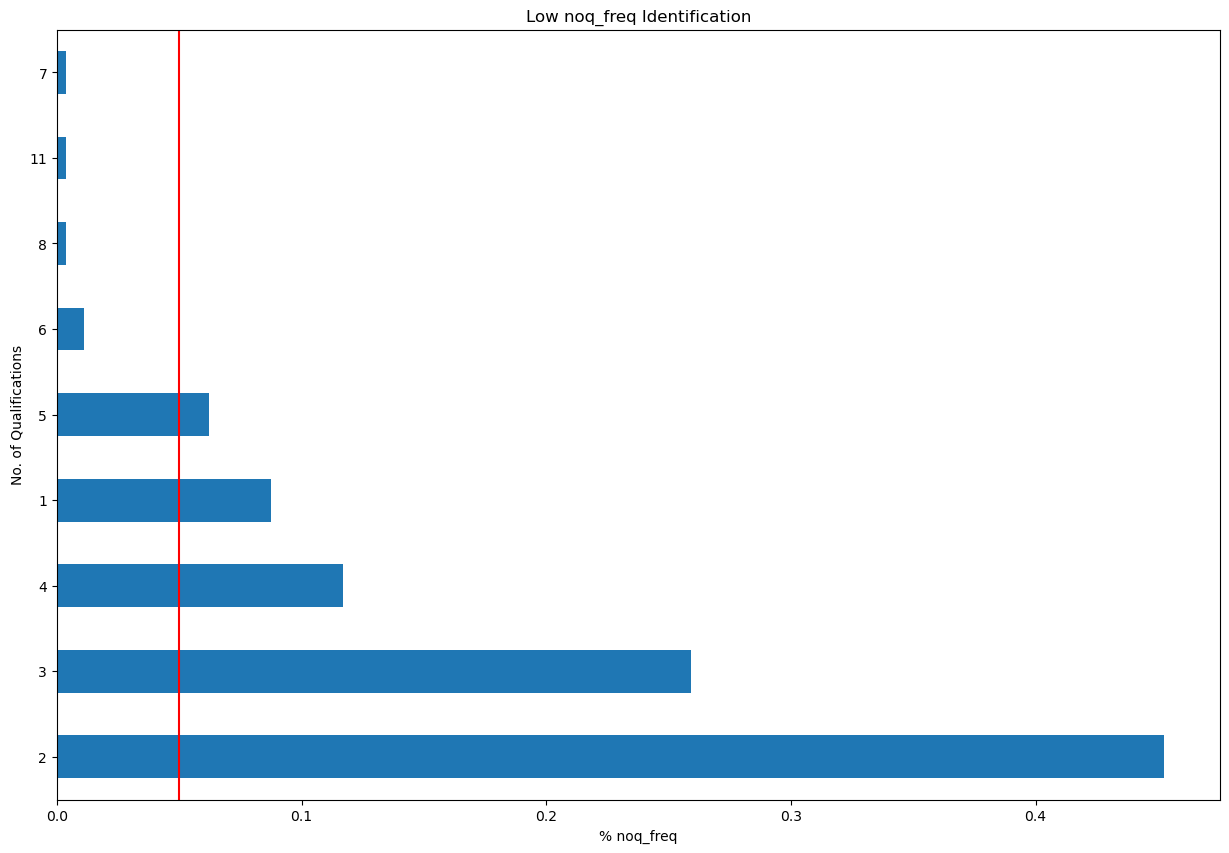

In [82]:
# Visualise to determine what threshold to use
fig = noq_freq.sort_values(ascending=False).plot.barh(figsize=(15,10))
fig.axvline(x=0.05, color='red')
fig.set_xlabel('% noq_freq')
fig.set_ylabel('No. of Qualifications')
fig.set_title('Low noq_freq Identification')
plt.show()

With 5% as the threshold, I will group 'No of Qualifications' > 5 as '6+'

In [83]:
sis['No. of Qualifications'].mask(sis['No. of Qualifications']>5, '6+', inplace=True)

/var/folders/wz/1k6yj9pn3kj1s5gppbqtnn280000gn/T/ipykernel_24816/156349633.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6+' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sis['No. of Qualifications'].mask(sis['No. of Qualifications']>5, '6+', inplace=True)


In [84]:
sis['No. of Qualifications'].value_counts()

No. of Qualifications
2     124
3      71
4      32
1      24
5      17
6+      6
Name: count, dtype: int64

In [85]:
sis['No. of Qualifications'].isnull().sum()

0

In [86]:
sis.head(1)

,Location,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria,No. of Qualifications
0,Liverpool,Business,<2011,Abbas Houda,Masters,MA,Other,"Bachelor of Science (Communications), Master of Arts (International Affairs), Master of Business Administrat (Business Administration)","BUS2403 - Innovation & Entrepreneurship\nBUS2003 - Business and Commercial Law\nLSG2013 - Globalization, Media & Soc\nBUS1003 - Management and Leadership",Business Administration,"10+ Years Small Business Ownership, 10+ Years SME Consulting, 10+ Years Corporate/Vocational Business Training, 8 Years Teaching Experience",Industry & Teaching experience,3


In [87]:
# Inspect 'Courses Taught- Term 201510' column
sis['Courses Taught- Term 201510'].nunique()

261

Almost every value is unique in this column which is largely down to the inconsistency in formatting. Many records contain course codes, and many do not. Courses use different seperators such as line spaces, commas, the word 'and', as well as hyphons.

The cardinality and consistency issues in this column make it a poor predictor for a ML model so I will drop this. The next column along, 'Major Teaching Field', will likely be more usable.

In [88]:
sis.drop('Courses Taught- Term 201510', axis=1, inplace=True)

In [89]:
sis['MAJOR TEACHING FIELD'].value_counts()

MAJOR TEACHING FIELD
General Business                                            19
Management                                                  10
Management                                                  10
Accounting                                                   9
HRM                                                          7
                                                            ..
Strategic Mgt, Supply chain, Innovation, Marketing           1
HRM, Quality and Tourism                                     1
Management Science                                           1
Business Adminstration/Finance and Investment Management     1
Financial Mgt, Project Mgt, Entrepreneurial Finance          1
Name: count, Length: 143, dtype: int64

This column also has inconsistent formatting. However, 'MAJOR TEACHING FIELD' resembles the 'Major' column in terms of categories, so I will group values by common sub-strings and assign them to common categories.

The column title 'MAJOR TEACHING FIELD' suggests the value should be singular so summarising teaching fields into a singular category also makes sense in this regard.

In [90]:
counts = sis['MAJOR TEACHING FIELD'].value_counts() 
valids = counts[counts>4].index

sis['MAJOR TEACHING FIELD'][sis['MAJOR TEACHING FIELD'].isin(valids)].unique()

array(['Business Administration', 'HRM', 'Economics', 'Accounting',
       'Management', 'Management ', 'General Business'], dtype=object)

Based on the above most common values, and the 'Major' column, I will use the following categories:
* Business Administration (Includes General Business and other Business related teaching fields)
* Management (Captures Management, HRM etc.)
* Finance (Economics, Accounting etc.)
* Other

In [91]:
mtf = sis['MAJOR TEACHING FIELD']

mtf.mask(mtf.str.contains('Busines', case=False) == True, 'Business Administration', inplace=True)
mtf.mask(mtf.str.contains('Manag', case=False) == True, 'Management', inplace=True)
mtf.mask(mtf.str.contains('Mgt', case=False) == True, 'Management', inplace=True)
mtf.mask(mtf.str.contains('Mgmt', case=False) == True, 'Management', inplace=True)
mtf.mask(mtf.str.contains('HRM', case=False) == True, 'Management', inplace=True)
mtf.mask(mtf.str.contains('Economics', case=False) == True, 'Finance', inplace=True)
mtf.mask(mtf.str.contains('Account', case=False) == True, 'Finance', inplace=True)
mtf.mask(mtf.str.contains('Finan', case=False) == True, 'Finance', inplace=True)

In [92]:
mtf.value_counts()

MAJOR TEACHING FIELD
Business Administration                         86
Management                                      79
Finance                                         40
Marketing                                        3
Marketing                                        3
Human Resources                                  2
Commercial Law                                   1
Entrepreneurship                                 1
HR and Entrepreneurship                          1
Law                                              1
Human Resources                                  1
Marketing and Strategy                           1
Tourism, Marketing, Organisational Behaviour     1
Corporate and Commercial Law                     1
Quality and Organizational Behavior              1
Maurice Hedwell                                  1
International Marketing                          1
More than 5 years work experience                1
Name: count, dtype: int64

Based on new value counts, I will create a category called 'Other' for anything outside the top 3 most frequent values

In [93]:
low_freq_mtf = mtf.value_counts()[mtf.value_counts() < 39].index
mtf.replace(low_freq_mtf, 'Other', inplace=True)

In [94]:
mtf.value_counts()

MAJOR TEACHING FIELD
Business Administration    86
Management                 79
Finance                    40
Other                      20
Name: count, dtype: int64

In [95]:
# Now check null values
mtf.isnull().sum()

49

In [96]:
# As 'Major' and 'MAJOR TEACHING FIELD' use similar categories. Impute missing values using 'Major' column.
mtf.fillna(sis['Major'], inplace=True)

In [97]:
mtf.isnull().sum()

0

In [98]:
sis['MAJOR TEACHING FIELD'] = mtf

Now compare value_counts for each column. I expect these to be similar based on the assumption that people are likely to teach in the field in which the major.

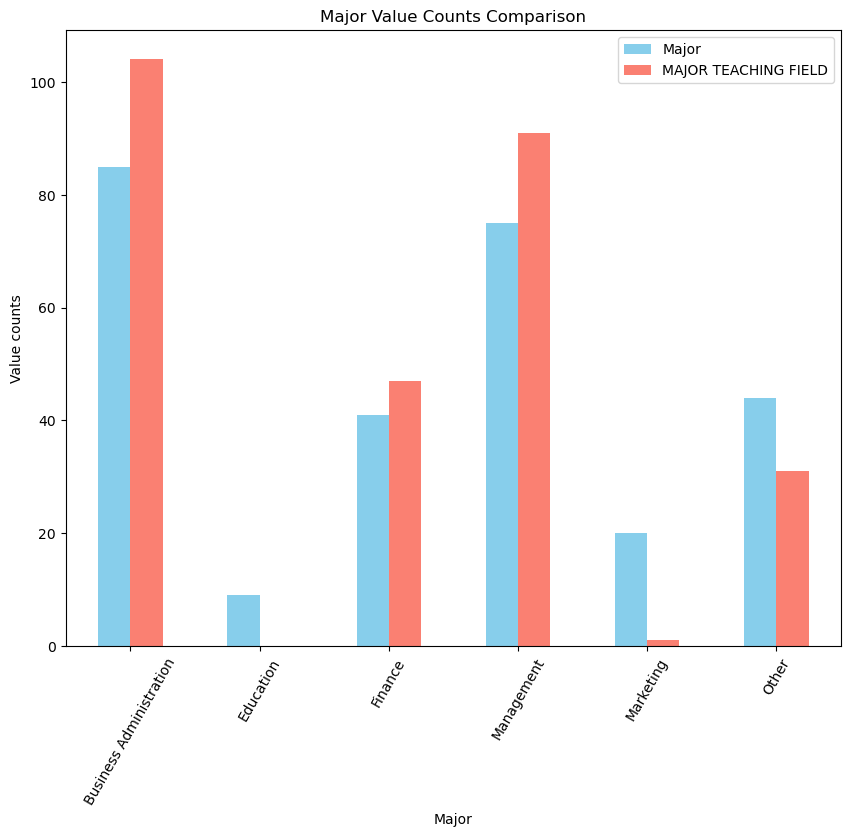

In [99]:
maj_count = sis['Major'].value_counts()
mtf_count = sis['MAJOR TEACHING FIELD'].value_counts()
count_df = pd.DataFrame({'Major':maj_count, 'MAJOR TEACHING FIELD':mtf_count})

ax = count_df.plot.bar(color=['SkyBlue', 'Salmon'],title = "Major Value Counts Comparison", figsize=(10,8))
ax.set_xlabel('Major')
ax.set_ylabel('Value counts')

plt.xticks(rotation=60)

plt.show()

Value counts for each bar is similar, but not identical. This indicates that some people teach in different fields to their major, or that they had more than one teaching field and their new teaching category is different to their major. 

I will retain both these of columns for ML model use.

In [100]:
sis.rename(columns={'MAJOR TEACHING FIELD':'Major Teaching Field'}, inplace=True)

In [101]:
sis.head(1)

,Location,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,All Qualifications from Profile,Major Teaching Field,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria,No. of Qualifications
0,Liverpool,Business,<2011,Abbas Houda,Masters,MA,Other,"Bachelor of Science (Communications), Master of Arts (International Affairs), Master of Business Administrat (Business Administration)",Business Administration,"10+ Years Small Business Ownership, 10+ Years SME Consulting, 10+ Years Corporate/Vocational Business Training, 8 Years Teaching Experience",Industry & Teaching experience,3


In [102]:
# Rename 'DOCUMENT OTHER....' column
sis.rename(columns={'DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications':'Experience'}, inplace=True)

In [103]:
sis.head(1)

,Location,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,All Qualifications from Profile,Major Teaching Field,Experience,Criteria,No. of Qualifications
0,Liverpool,Business,<2011,Abbas Houda,Masters,MA,Other,"Bachelor of Science (Communications), Master of Arts (International Affairs), Master of Business Administrat (Business Administration)",Business Administration,"10+ Years Small Business Ownership, 10+ Years SME Consulting, 10+ Years Corporate/Vocational Business Training, 8 Years Teaching Experience",Industry & Teaching experience,3


Data in the Experience column is unstructured so will be very difficult to prepare for ML model use. I will first inspect the 'Criteria' column and then revisit 'Experience'

In [104]:
sis['Criteria'].value_counts()

Criteria
Industry & Teaching experience                     221
Certification                                       27
Researcher                                          15
Researcher/Curriculum Development                    4
Certification/Curriculum Development                 3
Trainee                                              2
Certification/Researcher/Curriculum Development      1
Certification/Researcher                             1
Name: count, dtype: int64

There are 3 clear categories in this column.
* Industry & Teaching experience
* Certification
* Researcher
* Trainee

I will amend outlier values to fit these categories. In the instance where Certification and researcher both appear in a value, whichever comes first will be used to categorise the value.

In [105]:
sis['Criteria'].mask(sis['Criteria'].str.contains('Researcher/') == True, 'Researcher', inplace=True)
sis['Criteria'].mask(sis['Criteria'].str.contains('Certification/') == True, 'Certification', inplace=True)

In [106]:
sis['Criteria'].value_counts()

Criteria
Industry & Teaching experience    221
Certification                      31
Researcher                         20
Trainee                             2
Name: count, dtype: int64

As above, almost everyone experience through Industry & Teaching, Certification, or through research.
The 'Experience' column contains data with details on years of experience. However, due to the unstructured and inconsistent format, as well as the large number of missing values, I will drop this column.

In [107]:
sis.drop('Experience', axis=1, inplace=True)

### Now all columns have been reviewed. Review overall missing values and column cardinality

In [108]:
sis.isnull().sum()

Location                           0
Title                              0
Join Date                          0
Reports To                         0
Highest Qualification Level        6
Highest Qualification              6
Major                              0
All Qualifications from Profile    0
Major Teaching Field               0
Criteria                           0
No. of Qualifications              0
dtype: int64

In [109]:
# Review 6 missing values above
sis[sis['Highest Qualification Level'].isnull()]

,Location,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,All Qualifications from Profile,Major Teaching Field,Criteria,No. of Qualifications
19,Liverpool,Business,2015,Abbas Houda,NaN,NaN,Other,"Post Graduate Diploma (Political Science), Masters (International Relation), Diploma (Physical Education), Masters (Business Management)",Business Administration,Industry & Teaching experience,4
99,Bristol,Business,2015,Nick Omotayo,NaN,NaN,Other,"Bachelor (Hospitality Management), Masters (Business)",Other,Industry & Teaching experience,2
101,Bristol,Business,2015,Daphne Keaton,NaN,NaN,Other,"Masters (Finance), Bachelor (Economics)",Other,Industry & Teaching experience,2
245,Leicester,Business,2015,Olu Ebenezer,NaN,NaN,Other,"Bachelor (Accounting), Masters (Business)",Finance,Industry & Teaching experience,2
258,Cambridge,Business,2015,Olu Ebenezer,NaN,NaN,Other,"Masters (Finance), Bachelor (Accounting & Finance), Post Degree Certificate ()",Other,Industry & Teaching experience,3
259,Cambridge,Business,2015,Olu Ebenezer,NaN,NaN,Other,"Bachelor (English Language & Literature), Masters (Computer Science), Ph.D (Computing)",Business Administration,Industry & Teaching experience,3


Use info in 'All Qualifications from Profile' to impute missing values

In [110]:
sis.at[19, 'Highest Qualification Level'] = 'Masters'
sis.at[19, 'Highest Qualification'] = 'MBA'
sis.at[99, 'Highest Qualification Level'] = 'Masters'
sis.at[99, 'Highest Qualification'] = 'MBA'
sis.at[101, 'Highest Qualification Level'] = 'Masters'
sis.at[101, 'Highest Qualification'] = 'Other'
sis.at[245, 'Highest Qualification Level'] = 'Masters'
sis.at[245, 'Highest Qualification'] = 'MBA'
sis.at[258, 'Highest Qualification Level'] = 'Masters'
sis.at[258, 'Highest Qualification'] = 'Other'
sis.at[259, 'Highest Qualification Level'] = 'Masters'
sis.at[259, 'Highest Qualification'] = 'MSc'

In [111]:
sis.isnull().sum()

Location                           0
Title                              0
Join Date                          0
Reports To                         0
Highest Qualification Level        0
Highest Qualification              0
Major                              0
All Qualifications from Profile    0
Major Teaching Field               0
Criteria                           0
No. of Qualifications              0
dtype: int64

Text(0.5, 1.0, 'Cardinality')

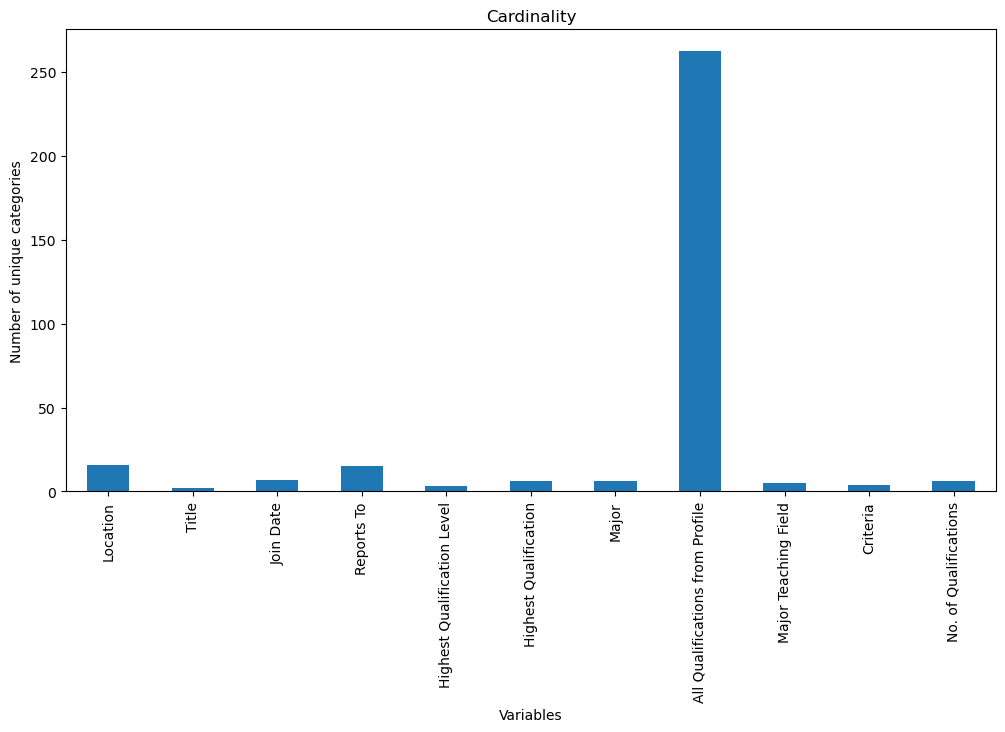

In [112]:
# Visualise new column cardinality in a bar chart
sis.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [113]:
# Drop 'All Qualifications from Profile' as this is no longer needed
sis.drop('All Qualifications from Profile', axis=1, inplace=True)

Text(0.5, 1.0, 'Cardinality')

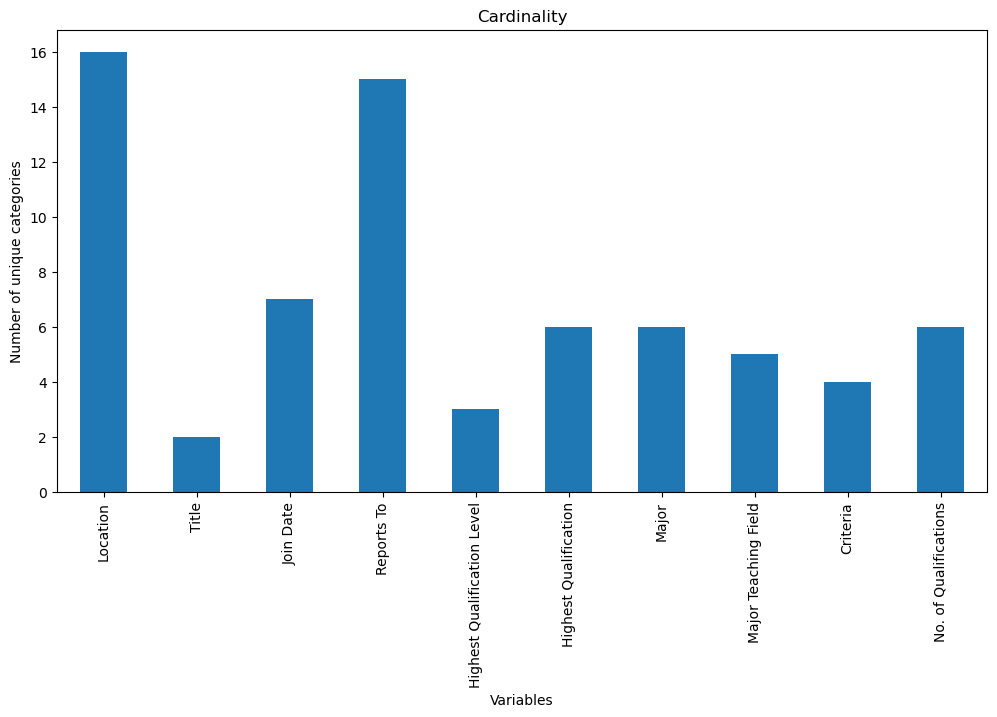

In [114]:
# Visualise new column cardinality in a bar chart
sis.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

### Data missing values and cardinality issues has now been reviewed
* Next I need to consider data types so the data can be preprocessed for ML model use

In [115]:
sis.dtypes

Location                       object
Title                          object
Join Date                      object
Reports To                     object
Highest Qualification Level    object
Highest Qualification          object
Major                          object
Major Teaching Field           object
Criteria                       object
No. of Qualifications          object
dtype: object

dtypes are all 'object'. This means I will need to use a categorical encoding tool.

In [116]:
sis.nunique()

Location                       16
Title                           2
Join Date                       7
Reports To                     15
Highest Qualification Level     3
Highest Qualification           6
Major                           6
Major Teaching Field            5
Criteria                        4
No. of Qualifications           6
dtype: int64

In [117]:
sis.nunique().sum()

70

* The 'sis' data only has 270 rows. 
* Despite working to reduce cardinality, there are still 70 unique values across all columns.
* There is not enough data to One Hot Encode every column, and there is not information to One Hot Encode a specific subset as we do not know which ML model will be used, or for what purpose.
* I will use the sklearn LabelEncoder library to convert my categorical data into numerical data

In [118]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [119]:
# First save un-encoded clean data to csv before encoding
#sis.to_csv('SIS_clean')

In [120]:
sis.columns

Index(['Location', 'Title', 'Join Date', 'Reports To',
       'Highest Qualification Level', 'Highest Qualification', 'Major',
       'Major Teaching Field', 'Criteria', 'No. of Qualifications'],
      dtype='object')

In [121]:
# No. of Qualifications is already a number so doesn't need to be encoded
cols = ['Location', 'Title', 'Join Date', 'Reports To',
       'Highest Qualification Level', 'Highest Qualification', 'Major',
       'Major Teaching Field', 'Criteria']

In [122]:
sis.head()

,Location,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,Major Teaching Field,Criteria,No. of Qualifications
0,Liverpool,Business,<2011,Abbas Houda,Masters,MA,Other,Business Administration,Industry & Teaching experience,3
1,Liverpool,Business,<2011,Abbas Houda,Masters,MSc,Business Administration,Business Administration,Certification,3
2,Liverpool,Business,<2011,Abbas Houda,Masters,MBA,Marketing,Management,Industry & Teaching experience,5
3,Liverpool,Business,2016,Abbas Houda,Doctorate,Ph.D,Management,Management,Researcher,2
4,London,Business,2016,Tony Emmanuel,Doctorate,Ph.D,Business Administration,Business Administration,Researcher,2


In [123]:
le = LabelEncoder()

for feature in cols:
    sis[feature] = le.fit_transform(sis[feature].astype(str))

In [124]:
sis.head()

,Location,Title,Join Date,Reports To,Highest Qualification Level,Highest Qualification,Major,Major Teaching Field,Criteria,No. of Qualifications
0,11,0,6,0,2,1,5,0,1,3
1,11,0,6,0,2,3,0,0,0,3
2,11,0,6,0,2,2,4,2,1,5
3,11,0,5,0,1,5,3,2,2,2
4,12,0,5,14,1,5,0,0,2,2


In [125]:
# Save encoded data to csv
#sis.to_csv('SIS_clean_encoded')